# Assignment 3 - Task 4: Comparative Analysis

## Objective
Perform detailed comparative analysis of all three sentiment analysis methods:
- FinBERT
- Local LLM
- RAG-Enhanced

This includes error analysis, pattern identification, and in-depth insights.

---

## Step 1: Import Libraries and Load Results


In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

print("Libraries imported successfully!")


Libraries imported successfully!


In [33]:
# Load results from Task 3
results_file = 'sentiment_analysis_results.csv'

if os.path.exists(results_file):
    df = pd.read_csv(results_file, encoding='utf-8')
    print(f"✓ Results loaded successfully!")
    print(f"Total sentences: {len(df):,}")
    print(f"\nColumns: {list(df.columns)}")

    # Load dataset with topics if available
    topics_file = 'dataset_with_topics.csv'
    if os.path.exists(topics_file):
        df_topics = pd.read_csv(topics_file, encoding='utf-8')
        print(f"✓ Topic file '{topics_file}' loaded.")
        print(f"  Columns in topic file: {list(df_topics.columns)}")
        # Merge topic information
        if 'dominant_topic' in df_topics.columns:
            df = df.merge(df_topics[['sentence', 'dominant_topic', 'topic_label']],
                         on='sentence', how='left')
            print(f"✓ Topic information merged")
        else:
            print(f"⚠️ Error: 'dominant_topic' column not found in {topics_file}. Cannot merge topics.")

    print(f"\nFirst few rows:")
    display(df.head())
else:
    print(f"⚠️ Error: {results_file} not found!")
    print("Please make sure you've completed Task 3 and have sentiment_analysis_results.csv")

✓ Results loaded successfully!
Total sentences: 2,264

Columns: ['sentence', 'sentiment', 'finbert_prediction', 'llm_prediction', 'rag_prediction']
✓ Topic file 'dataset_with_topics.csv' loaded.
  Columns in topic file: ['sentence', 'processed_text', 'sentiment', 'token_count', 'original_length', 'processed_length', 'dominant_topic', 'topic_probability', 'topic_label']
✓ Topic information merged

First few rows:


,sentence,sentiment,finbert_prediction,llm_prediction,rag_prediction,dominant_topic,topic_label
0,"According to Gran , the company has no plans t...",neutral,negative,neutral,neutral,5.0,Company Operations and Business
1,"For the last quarter of 2010 , Componenta 's n...",positive,positive,neutral,positive,3.0,Company Financial Performance
2,"In the third quarter of 2010 , net sales incre...",positive,positive,positive,positive,3.0,Company Financial Performance
3,Operating profit rose to EUR 13.1 mn from EUR ...,positive,positive,neutral,positive,3.0,Company Financial Performance
4,"Operating profit totalled EUR 21.1 mn , up fro...",positive,positive,neutral,positive,3.0,Company Financial Performance


## Step 2: Comprehensive Metrics Comparison Table

Create a detailed comparison of all metrics across all three methods.


In [34]:
# Calculate comprehensive metrics for all methods
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

y_true = df['sentiment'].tolist()

methods = ['finbert_prediction', 'llm_prediction', 'rag_prediction']
method_names = ['FinBERT', 'Local LLM', 'RAG-Enhanced']
labels = ['positive', 'neutral', 'negative']

# Calculate metrics for each method
comparison_metrics = []

for method_col, method_name in zip(methods, method_names):
    if method_col in df.columns:
        y_pred = df[method_col].dropna().tolist()
        y_true_filtered = [df.iloc[i]['sentiment'] for i in df.index if pd.notna(df.loc[i, method_col])]

        if len(y_pred) == len(y_true_filtered):
            accuracy = accuracy_score(y_true_filtered, y_pred)

            # Per-class metrics
            precision, recall, f1, support = precision_recall_fscore_support(
                y_true_filtered, y_pred, labels=labels, average=None, zero_division=0
            )

            # Macro averages
            macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(
                y_true_filtered, y_pred, labels=labels, average='macro', zero_division=0
            )

            # Micro averages
            micro_precision, micro_recall, micro_f1, _ = precision_recall_fscore_support(
                y_true_filtered, y_pred, labels=labels, average='micro', zero_division=0
            )

            # Confusion matrix
            cm = confusion_matrix(y_true_filtered, y_pred, labels=labels)

            comparison_metrics.append({
                'Method': method_name,
                'Accuracy': accuracy,
                'Macro Precision': macro_precision,
                'Macro Recall': macro_recall,
                'Macro F1': macro_f1,
                'Micro Precision': micro_precision,
                'Micro Recall': micro_recall,
                'Micro F1': micro_f1,
                'Positive Precision': precision[0],
                'Positive Recall': recall[0],
                'Positive F1': f1[0],
                'Neutral Precision': precision[1],
                'Neutral Recall': recall[1],
                'Neutral F1': f1[1],
                'Negative Precision': precision[2],
                'Negative Recall': recall[2],
                'Negative F1': f1[2]
            })

comparison_df = pd.DataFrame(comparison_metrics)

print("="*80)
print("COMPREHENSIVE METRICS COMPARISON TABLE")
print("="*80)
print("\nOverall Metrics:")
print(comparison_df[['Method', 'Accuracy', 'Macro Precision', 'Macro Recall', 'Macro F1',
                     'Micro Precision', 'Micro Recall', 'Micro F1']].to_string(index=False))

print("\n" + "="*80)
print("Per-Class Metrics:")
print("="*80)
per_class_cols = ['Method', 'Positive Precision', 'Positive Recall', 'Positive F1',
                  'Neutral Precision', 'Neutral Recall', 'Neutral F1',
                  'Negative Precision', 'Negative Recall', 'Negative F1']
print(comparison_df[per_class_cols].to_string(index=False))


COMPREHENSIVE METRICS COMPARISON TABLE

Overall Metrics:
      Method  Accuracy  Macro Precision  Macro Recall  Macro F1  Micro Precision  Micro Recall  Micro F1
     FinBERT  0.253738         0.335256      0.331352  0.328391         0.253738      0.253738  0.253738
   Local LLM  0.715919         0.814953      0.532162  0.575372         0.715919      0.715919  0.715919
RAG-Enhanced  0.844767         0.798319      0.787079  0.792006         0.844767      0.844767  0.844767

Per-Class Metrics:
      Method  Positive Precision  Positive Recall  Positive F1  Neutral Precision  Neutral Recall  Neutral F1  Negative Precision  Negative Recall  Negative F1
     FinBERT            0.947279         0.977193     0.962003           0.057751        0.013562    0.021965            0.000737         0.003300     0.001205
   Local LLM            0.864130         0.278947     0.421751           0.691840        0.974304    0.809129            0.888889         0.343234     0.495238
RAG-Enhanced           

## Step 3: Visual Comparison Charts

Create comprehensive visualizations comparing all three methods.


Libraries imported successfully!


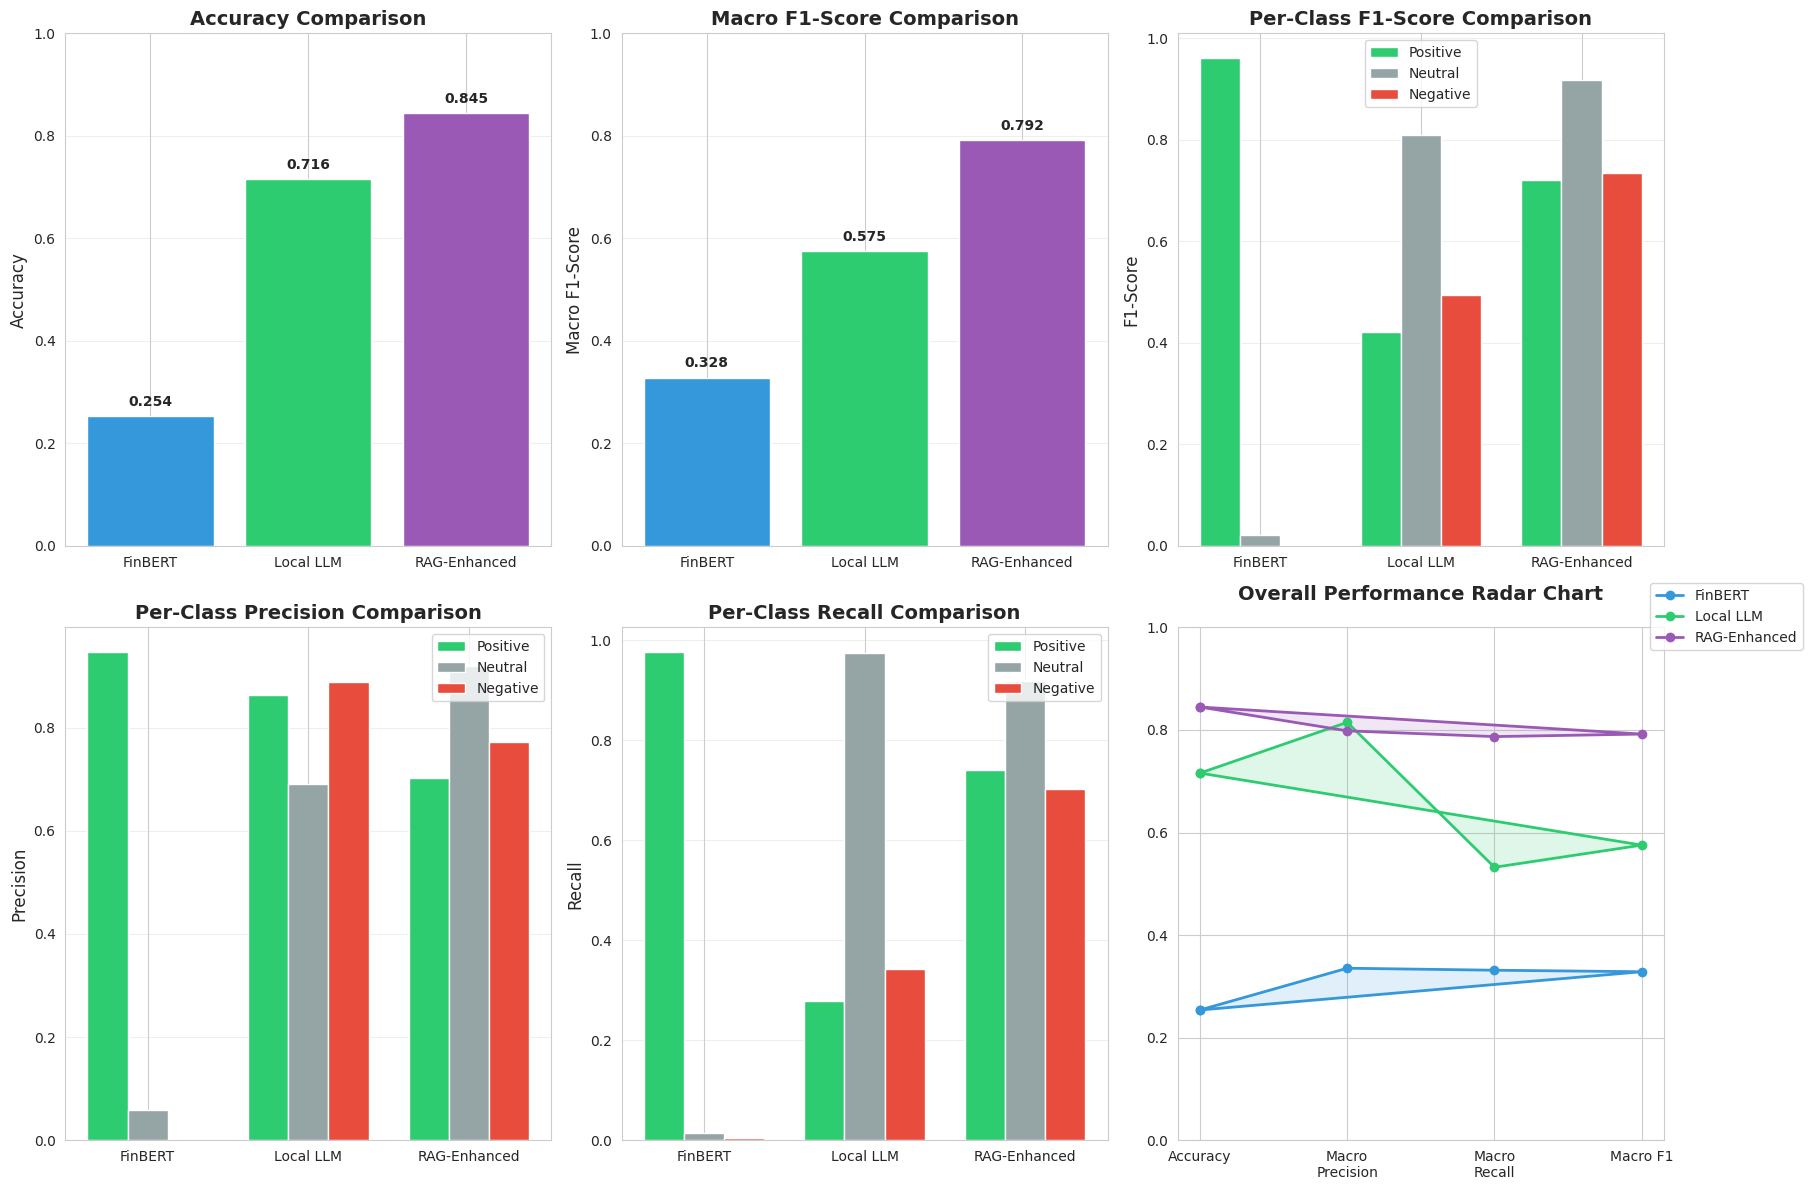

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

print("Libraries imported successfully!")
# Create comprehensive comparison visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Use a new variable for display names used in plots
display_methods = comparison_df['Method'].tolist()
colors = ['#3498db', '#2ecc71', '#9b59b6']

# 1. Accuracy comparison
axes[0, 0].bar(display_methods, comparison_df['Accuracy'], color=colors)
axes[0, 0].set_title('Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Accuracy', fontsize=12)
axes[0, 0].set_ylim([0, 1])
axes[0, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(comparison_df['Accuracy']):
    axes[0, 0].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

# 2. Macro F1 comparison
axes[0, 1].bar(display_methods, comparison_df['Macro F1'], color=colors)
axes[0, 1].set_title('Macro F1-Score Comparison', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Macro F1-Score', fontsize=12)
axes[0, 1].set_ylim([0, 1])
axes[0, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(comparison_df['Macro F1']):
    axes[0, 1].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

# 3. Per-class F1 comparison
x = np.arange(len(display_methods))
width = 0.25
axes[0, 2].bar(x - width, comparison_df['Positive F1'], width, label='Positive', color='#2ecc71')
axes[0, 2].bar(x, comparison_df['Neutral F1'], width, label='Neutral', color='#95a5a6')
axes[0, 2].bar(x + width, comparison_df['Negative F1'], width, label='Negative', color='#e74c3c')
axes[0, 2].set_title('Per-Class F1-Score Comparison', fontsize=14, fontweight='bold')
axes[0, 2].set_ylabel('F1-Score', fontsize=12)
axes[0, 2].set_xticks(x)
axes[0, 2].set_xticklabels(display_methods)
axes[0, 2].legend()
axes[0, 2].grid(axis='y', alpha=0.3)

# 4. Precision comparison
axes[1, 0].bar(x - width, comparison_df['Positive Precision'], width, label='Positive', color='#2ecc71')
axes[1, 0].bar(x, comparison_df['Neutral Precision'], width, label='Neutral', color='#95a5a6')
axes[1, 0].bar(x + width, comparison_df['Negative Precision'], width, label='Negative', color='#e74c3c')
axes[1, 0].set_title('Per-Class Precision Comparison', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Precision', fontsize=12)
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(display_methods)
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# 5. Recall comparison
axes[1, 1].bar(x - width, comparison_df['Positive Recall'], width, label='Positive', color='#2ecc71')
axes[1, 1].bar(x, comparison_df['Neutral Recall'], width, label='Neutral', color='#95a5a6')
axes[1, 1].bar(x + width, comparison_df['Negative Recall'], width, label='Negative', color='#e74c3c')
axes[1, 1].set_title('Per-Class Recall Comparison', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Recall', fontsize=12)
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(display_methods)
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

# 6. Radar chart for overall metrics
from math import pi

categories = ['Accuracy', 'Macro\nPrecision', 'Macro\nRecall', 'Macro F1']
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

for idx, (method, color) in enumerate(zip(display_methods, colors)):
    values = [
        comparison_df.loc[idx, 'Accuracy'],
        comparison_df.loc[idx, 'Macro Precision'],
        comparison_df.loc[idx, 'Macro Recall'],
        comparison_df.loc[idx, 'Macro F1']
    ]
    values += values[:1]

    axes[1, 2].plot(angles, values, 'o-', linewidth=2, label=method, color=color)
    axes[1, 2].fill(angles, values, alpha=0.15, color=color)

axes[1, 2].set_xticks(angles[:-1])
axes[1, 2].set_xticklabels(categories)
axes[1, 2].set_ylim([0, 1])
axes[1, 2].set_title('Overall Performance Radar Chart', fontsize=14, fontweight='bold', pad=20)
axes[1, 2].legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
axes[1, 2].grid(True)

plt.tight_layout()
plt.show()

In [36]:
# Identify misclassified sentences for each method
print("="*80)
print("ERROR ANALYSIS: MISCLASSIFIED SENTENCES")
print("="*80)

error_analysis = {}

for method_col, method_name in zip(methods, method_names):
    if method_col in df.columns:
        # Find misclassified sentences
        df['is_correct_' + method_col.replace('_prediction', '')] = (
            df['sentiment'] == df[method_col]
        )

        errors = df[df['sentiment'] != df[method_col]].copy()
        error_analysis[method_name] = errors

        print(f"\n{method_name}:")
        print(f"  Total errors: {len(errors)}")
        print(f"  Accuracy: {(len(df) - len(errors)) / len(df) * 100:.2f}%")

        # Error breakdown by true label
        if len(errors) > 0:
            error_by_label = errors['sentiment'].value_counts()
            print(f"  Errors by true label:")
            for label, count in error_by_label.items():
                print(f"    {label}: {count} errors")

print("\n" + "="*80)


ERROR ANALYSIS: MISCLASSIFIED SENTENCES

FinBERT:
  Total errors: 1697
  Accuracy: 25.37%
  Errors by true label:
    neutral: 1382 errors
    negative: 302 errors
    positive: 13 errors

Local LLM:
  Total errors: 646
  Accuracy: 71.59%
  Errors by true label:
    positive: 411 errors
    negative: 199 errors
    neutral: 36 errors

RAG-Enhanced:
  Total errors: 353
  Accuracy: 84.48%
  Errors by true label:
    positive: 148 errors
    neutral: 115 errors
    negative: 90 errors



In [37]:
# Analyze error patterns: What does each method confuse?
print("="*80)
print("ERROR PATTERN ANALYSIS: CONFUSION PATTERNS")
print("="*80)

for method_col, method_name in zip(methods, method_names):
    if method_col in df.columns:
        errors = df[df['sentiment'] != df[method_col]].copy()

        if len(errors) > 0:
            print(f"\n{method_name} - Confusion Patterns:")
            print(f"{'True Label':<15} {'Predicted Label':<15} {'Count':<10}")
            print("-" * 40)

            confusion_patterns = errors.groupby(['sentiment', method_col]).size().reset_index(name='count')
            confusion_patterns = confusion_patterns.sort_values('count', ascending=False)

            for _, row in confusion_patterns.head(10).iterrows():
                print(f"{row['sentiment']:<15} {row[method_col]:<15} {row['count']:<10}")

            print()


ERROR PATTERN ANALYSIS: CONFUSION PATTERNS

FinBERT - Confusion Patterns:
True Label      Predicted Label Count     
----------------------------------------
neutral         negative        1355      
negative        neutral         298       
neutral         positive        27        
positive        neutral         12        
negative        positive        4         
positive        negative        1         


Local LLM - Confusion Patterns:
True Label      Predicted Label Count     
----------------------------------------
positive        neutral         409       
negative        neutral         199       
neutral         positive        25        
neutral         negative        11        
positive        negative        2         


RAG-Enhanced - Confusion Patterns:
True Label      Predicted Label Count     
----------------------------------------
neutral         positive        102       
positive        neutral         98        
negative        positive        76        
p

In [38]:
# Sample error cases for manual inspection
print("="*80)
print("MANUAL ERROR INSPECTION: SAMPLE ERROR CASES")
print("="*80)

# Get errors from each method
for method_col, method_name in zip(methods, method_names):
    if method_col in df.columns:
        errors = df[df['sentiment'] != df[method_col]].copy()

        if len(errors) > 0:
            print(f"\n{'='*80}")
            print(f"{method_name.upper()} - ERROR CASES")
            print(f"{'='*80}\n")

            # Show different types of errors
            error_types = [
                ('positive', 'negative', 'Positive misclassified as Negative'),
                ('positive', 'neutral', 'Positive misclassified as Neutral'),
                ('negative', 'positive', 'Negative misclassified as Positive'),
                ('negative', 'neutral', 'Negative misclassified as Neutral'),
                ('neutral', 'positive', 'Neutral misclassified as Positive'),
                ('neutral', 'negative', 'Neutral misclassified as Negative')
            ]

            shown_count = 0
            for true_label, pred_label, description in error_types:
                type_errors = errors[
                    (errors['sentiment'] == true_label) &
                    (errors[method_col] == pred_label)
                ]

                if len(type_errors) > 0:
                    print(f"\n{description} ({len(type_errors)} cases):")
                    print("-" * 80)
                    for idx, row in type_errors.head(3).iterrows():
                        print(f"\nSentence: {row['sentence'][:150]}...")
                        print(f"True: {row['sentiment']} | Predicted: {row[method_col]}")
                        if 'topic_label' in row and pd.notna(row['topic_label']):
                            print(f"Topic: {row['topic_label']}")
                        shown_count += 1
                        if shown_count >= 15:  # Limit total shown
                            break
                    if shown_count >= 15:
                        break


MANUAL ERROR INSPECTION: SAMPLE ERROR CASES

FINBERT - ERROR CASES


Positive misclassified as Negative (1 cases):
--------------------------------------------------------------------------------

Sentence: Previously , EB delivered a custom solution for LG Electronics and now is making it commercially available for other mobile terminal vendors as well a...
True: positive | Predicted: negative
Topic: Company Financial Performance

Positive misclassified as Neutral (12 cases):
--------------------------------------------------------------------------------

Sentence: Unit costs for flight operations fell by 6.4 percent ....
True: positive | Predicted: neutral
Topic: Revenue and Earnings

Sentence: The loss for the third quarter of 2007 was EUR 0.3 mn smaller than the loss of the second quarter of 2007 ....
True: positive | Predicted: neutral
Topic: Company Financial Performance

Sentence: However , the broker gave an `` outperform '' recommendation on the stock ....
True: positive | Pr

## Step 6: Method-Specific Analysis

Deep dive into strengths and weaknesses of each method.


In [39]:
# Analyze FinBERT performance
print("="*80)
print("FINBERT ANALYSIS: STRENGTHS & WEAKNESSES")
print("="*80)

finbert_errors = error_analysis.get('FinBERT', pd.DataFrame())

if len(finbert_errors) > 0:
    print(f"\nTotal errors: {len(finbert_errors)}")
    print(f"Accuracy: {(len(df) - len(finbert_errors)) / len(df) * 100:.2f}%")

    # Analyze which topics FinBERT struggles with
    if 'topic_label' in finbert_errors.columns:
        print("\nError distribution by topic:")
        topic_errors = finbert_errors['topic_label'].value_counts().head(10)
        for topic, count in topic_errors.items():
            if pd.notna(topic):
                print(f"  {topic}: {count} errors")

    # Analyze sentence length in errors
    finbert_errors['sentence_length'] = finbert_errors['sentence'].str.len()
    avg_error_length = finbert_errors['sentence_length'].mean()
    avg_correct_length = df[df['sentiment'] == df['finbert_prediction']]['sentence'].str.len().mean()

    print(f"\nAverage sentence length in errors: {avg_error_length:.1f} chars")
    print(f"Average sentence length in correct: {avg_correct_length:.1f} chars")

    # Common error patterns
    print("\nMost common error patterns:")
    error_patterns = finbert_errors.groupby(['sentiment', 'finbert_prediction']).size().sort_values(ascending=False)
    for (true_lbl, pred_lbl), count in error_patterns.head(5).items():
        print(f"  {true_lbl} → {pred_lbl}: {count} cases")

print("\n" + "="*80)


FINBERT ANALYSIS: STRENGTHS & WEAKNESSES

Total errors: 1697
Accuracy: 25.37%

Error distribution by topic:
  Market Movement and Trading: 412 errors
  Company Financial Performance: 311 errors
  Company Operations and Business: 295 errors
  Unknown Topic: 262 errors
  Financial Metrics and Currency: 184 errors
  Revenue and Earnings: 158 errors
  Growth and Expansion: 57 errors

Average sentence length in errors: 119.5 chars
Average sentence length in correct: 129.9 chars

Most common error patterns:
  neutral → negative: 1355 cases
  negative → neutral: 298 cases
  neutral → positive: 27 cases
  positive → neutral: 12 cases
  negative → positive: 4 cases



In [40]:
# Analyze Local LLM performance
print("="*80)
print("LOCAL LLM ANALYSIS: STRENGTHS & WEAKNESSES")
print("="*80)

llm_errors = error_analysis.get('Local LLM', pd.DataFrame())

if len(llm_errors) > 0:
    print(f"\nTotal errors: {len(llm_errors)}")
    print(f"Accuracy: {(len(df) - len(llm_errors)) / len(df) * 100:.2f}%")

    # Compare with FinBERT
    finbert_errors = error_analysis.get('FinBERT', pd.DataFrame())
    print(f"\nComparison with FinBERT:")
    print(f"  FinBERT errors: {len(finbert_errors)}")
    print(f"  Local LLM errors: {len(llm_errors)}")
    if len(finbert_errors) > 0 and len(llm_errors) > 0:
        improvement = ((len(finbert_errors) - len(llm_errors)) / len(finbert_errors)) * 100
        print(f"  Improvement: {improvement:.1f}%")

    # Analyze which topics LLM struggles with
    if 'topic_label' in llm_errors.columns:
        print("\nError distribution by topic:")
        topic_errors = llm_errors['topic_label'].value_counts().head(10)
        for topic, count in topic_errors.items():
            if pd.notna(topic):
                print(f"  {topic}: {count} errors")

    # Common error patterns
    print("\nMost common error patterns:")
    if 'llm_prediction' in llm_errors.columns:
        error_patterns = llm_errors.groupby(['sentiment', 'llm_prediction']).size().sort_values(ascending=False)
        for (true_lbl, pred_lbl), count in error_patterns.head(5).items():
            print(f"  {true_lbl} → {pred_lbl}: {count} cases")

print("\n" + "="*80)


LOCAL LLM ANALYSIS: STRENGTHS & WEAKNESSES

Total errors: 646
Accuracy: 71.59%

Comparison with FinBERT:
  FinBERT errors: 1697
  Local LLM errors: 646
  Improvement: 61.9%

Error distribution by topic:
  Company Financial Performance: 351 errors
  Financial Metrics and Currency: 108 errors
  Market Movement and Trading: 67 errors
  Company Operations and Business: 53 errors
  Unknown Topic: 30 errors
  Revenue and Earnings: 29 errors
  Growth and Expansion: 7 errors

Most common error patterns:
  positive → neutral: 409 cases
  negative → neutral: 199 cases
  neutral → positive: 25 cases
  neutral → negative: 11 cases
  positive → negative: 2 cases



In [41]:
# Analyze RAG-Enhanced performance
print("="*80)
print("RAG-ENHANCED ANALYSIS: STRENGTHS & WEAKNESSES")
print("="*80)

rag_errors = error_analysis.get('RAG-Enhanced', pd.DataFrame())

if len(rag_errors) > 0:
    print(f"\nTotal errors: {len(rag_errors)}")
    print(f"Accuracy: {(len(df) - len(rag_errors)) / len(df) * 100:.2f}%")

    # Compare with Local LLM (baseline)
    llm_errors = error_analysis.get('Local LLM', pd.DataFrame())
    print(f"\nComparison with Local LLM (baseline):")
    if len(llm_errors) > 0 and len(rag_errors) > 0:
        improvement = ((len(llm_errors) - len(rag_errors)) / len(llm_errors)) * 100
        print(f"  Local LLM errors: {len(llm_errors)}")
        print(f"  RAG-Enhanced errors: {len(rag_errors)}")
        print(f"  Improvement: {improvement:.1f}%")

        if improvement > 0:
            print(f"\n✓ RAG helps! Retrieval improves sentiment analysis by {improvement:.1f}%")
        else:
            print(f"\n⚠ RAG doesn't help significantly. Retrieval improvement: {improvement:.1f}%")

    # Analyze when RAG helps vs doesn't help
    print("\nAnalyzing when RAG helps:")
    # Sentences where RAG is correct but LLM is wrong
    if 'llm_prediction' in df.columns and 'rag_prediction' in df.columns:
        rag_helps = df[
            (df['sentiment'] == df['rag_prediction']) &
            (df['sentiment'] != df['llm_prediction'])
        ]
        rag_hurts = df[
            (df['sentiment'] != df['rag_prediction']) &
            (df['sentiment'] == df['llm_prediction'])
        ]

        print(f"  Cases where RAG helps (correct when LLM wrong): {len(rag_helps)}")
        print(f"  Cases where RAG hurts (wrong when LLM correct): {len(rag_hurts)}")

        if len(rag_helps) > len(rag_hurts):
            print(f"\n✓ Overall, RAG provides net benefit!")
        else:
            print(f"\n⚠ RAG may not always help - need to analyze when it's beneficial")

print("\n" + "="*80)


RAG-ENHANCED ANALYSIS: STRENGTHS & WEAKNESSES

Total errors: 353
Accuracy: 84.48%

Comparison with Local LLM (baseline):
  Local LLM errors: 646
  RAG-Enhanced errors: 353
  Improvement: 45.4%

✓ RAG helps! Retrieval improves sentiment analysis by 45.4%

Analyzing when RAG helps:
  Cases where RAG helps (correct when LLM wrong): 465
  Cases where RAG hurts (wrong when LLM correct): 172

✓ Overall, RAG provides net benefit!



## Step 7: Performance by Topic

Analyze how each method performs across different financial topics discovered in Task 2.


PERFORMANCE BY TOPIC

Accuracy by Topic:


,Topic,Sample_Size,FinBERT,Local LLM,RAG-Enhanced
1,Company Financial Performance,589,0.471986,0.404075,0.784380
4,Market Movement and Trading,480,0.141667,0.860417,0.877083
0,Company Operations and Business,359,0.178273,0.852368,0.857939
5,Unknown Topic,297,0.117845,0.898990,0.915825
2,Financial Metrics and Currency,277,0.335740,0.610108,0.819495
3,Revenue and Earnings,185,0.145946,0.843243,0.837838
6,Growth and Expansion,68,0.161765,0.897059,0.867647


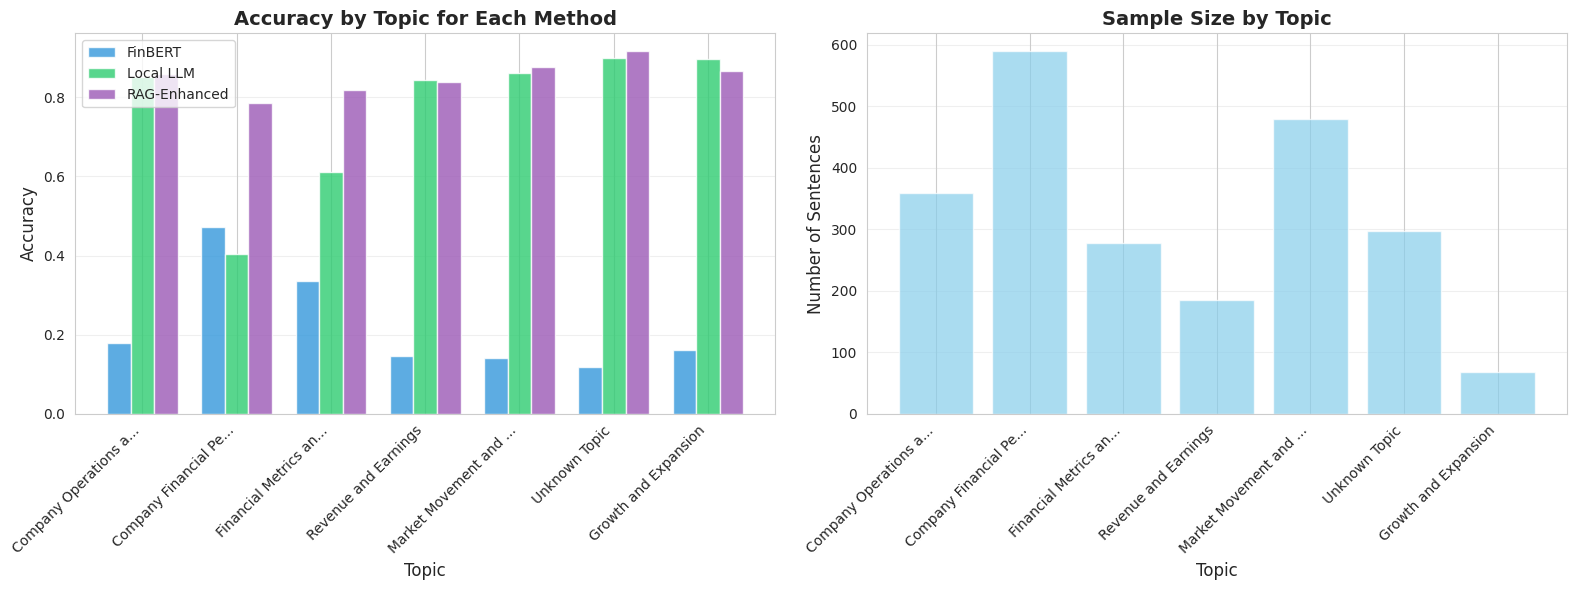

In [42]:
# Analyze performance by topic
if 'topic_label' in df.columns:
    print("="*80)
    print("PERFORMANCE BY TOPIC")
    print("="*80)

    topic_performance = []

    for topic in df['topic_label'].dropna().unique():
        topic_df = df[df['topic_label'] == topic]

        if len(topic_df) > 10:  # Only analyze topics with sufficient samples
            topic_accuracies = {}

            for method_col, method_name in zip(methods, method_names):
                if method_col in topic_df.columns:
                    correct = (topic_df['sentiment'] == topic_df[method_col]).sum()
                    total = len(topic_df[topic_df[method_col].notna()])
                    if total > 0:
                        acc = correct / total
                        topic_accuracies[method_name] = acc

            topic_performance.append({
                'Topic': topic,
                'Sample_Size': len(topic_df),
                **topic_accuracies
            })

    topic_perf_df = pd.DataFrame(topic_performance)

    if len(topic_perf_df) > 0:
        print("\nAccuracy by Topic:")
        display(topic_perf_df.sort_values('Sample_Size', ascending=False))

        # Visualize
        if len(topic_perf_df) > 0:
            fig, axes = plt.subplots(1, 2, figsize=(16, 6))

            # Bar chart of accuracies by topic
            topics_list = topic_perf_df['Topic'].tolist()
            x = np.arange(len(topics_list))
            width = 0.25

            for idx, method_name in enumerate(method_names):
                if method_name in topic_perf_df.columns:
                    values = topic_perf_df[method_name].tolist()
                    axes[0].bar(x + idx*width, values, width, label=method_name,
                               color=colors[idx], alpha=0.8)

            axes[0].set_xlabel('Topic', fontsize=12)
            axes[0].set_ylabel('Accuracy', fontsize=12)
            axes[0].set_title('Accuracy by Topic for Each Method', fontsize=14, fontweight='bold')
            axes[0].set_xticks(x + width)
            axes[0].set_xticklabels([t[:20] + '...' if len(t) > 20 else t for t in topics_list],
                                   rotation=45, ha='right')
            axes[0].legend()
            axes[0].grid(axis='y', alpha=0.3)

            # Sample size by topic
            axes[1].bar(range(len(topic_perf_df)), topic_perf_df['Sample_Size'],
                       color='skyblue', alpha=0.7)
            axes[1].set_xlabel('Topic', fontsize=12)
            axes[1].set_ylabel('Number of Sentences', fontsize=12)
            axes[1].set_title('Sample Size by Topic', fontsize=14, fontweight='bold')
            axes[1].set_xticks(range(len(topic_perf_df)))
            axes[1].set_xticklabels([t[:20] + '...' if len(t) > 20 else t for t in topics_list],
                                   rotation=45, ha='right')
            axes[1].grid(axis='y', alpha=0.3)

            plt.tight_layout()
            plt.show()
else:
    print("⚠️ Topic information not available. Make sure dataset_with_topics.csv is loaded.")


## Step 8: Agreement Analysis

Analyze when methods agree or disagree with each other.


In [43]:
# Agreement analysis between methods
print("="*80)
print("METHOD AGREEMENT ANALYSIS")
print("="*80)

# Check agreement between pairs
method_pairs = [
    ('finbert_prediction', 'llm_prediction', 'FinBERT vs Local LLM'),
    ('finbert_prediction', 'rag_prediction', 'FinBERT vs RAG-Enhanced'),
    ('llm_prediction', 'rag_prediction', 'Local LLM vs RAG-Enhanced')
]

for col1, col2, pair_name in method_pairs:
    if col1 in df.columns and col2 in df.columns:
        # Get rows where both predictions exist
        valid = df[df[col1].notna() & df[col2].notna()]

        if len(valid) > 0:
            agree = (valid[col1] == valid[col2]).sum()
            disagree = len(valid) - agree
            agreement_rate = agree / len(valid)

            print(f"\n{pair_name}:")
            print(f"  Agreement: {agree}/{len(valid)} ({agreement_rate*100:.2f}%)")
            print(f"  Disagreement: {disagree}/{len(valid)} ({(1-agreement_rate)*100:.2f}%)")

            # When they disagree, which one is correct more often?
            disagreements = valid[valid[col1] != valid[col2]]
            if len(disagreements) > 0:
                col1_correct = (disagreements['sentiment'] == disagreements[col1]).sum()
                col2_correct = (disagreements['sentiment'] == disagreements[col2]).sum()

                print(f"  When they disagree:")
                method1_name = method_names[methods.index(col1)]
                method2_name = method_names[methods.index(col2)]
                print(f"    {method1_name} correct: {col1_correct} times")
                print(f"    {method2_name} correct: {col2_correct} times")

print("\n" + "="*80)


METHOD AGREEMENT ANALYSIS

FinBERT vs Local LLM:
  Agreement: 393/2274 (17.28%)
  Disagreement: 1881/2274 (82.72%)
  When they disagree:
    FinBERT correct: 400 times
    Local LLM correct: 1451 times

FinBERT vs RAG-Enhanced:
  Agreement: 465/2274 (20.45%)
  Disagreement: 1809/2274 (79.55%)
  When they disagree:
    FinBERT correct: 148 times
    RAG-Enhanced correct: 1492 times

Local LLM vs RAG-Enhanced:
  Agreement: 1533/2274 (67.41%)
  Disagreement: 741/2274 (32.59%)
  When they disagree:
    Local LLM correct: 172 times
    RAG-Enhanced correct: 465 times



In [44]:
# Three-way agreement analysis
print("="*80)
print("THREE-WAY AGREEMENT ANALYSIS")
print("="*80)

if all(col in df.columns for col in methods):
    valid = df[df[methods[0]].notna() & df[methods[1]].notna() & df[methods[2]].notna()]

    if len(valid) > 0:
        # All three agree
        all_agree = ((valid[methods[0]] == valid[methods[1]]) &
                    (valid[methods[1]] == valid[methods[2]])).sum()

        # None agree (all different)
        all_different = ((valid[methods[0]] != valid[methods[1]]) &
                        (valid[methods[1]] != valid[methods[2]]) &
                        (valid[methods[0]] != valid[methods[2]])).sum()

        # Two agree, one differs
        two_agree = len(valid) - all_agree - all_different

        print(f"\nTotal sentences with all three predictions: {len(valid)}")
        print(f"\nAgreement patterns:")
        print(f"  All three methods agree: {all_agree} ({all_agree/len(valid)*100:.2f}%)")
        print(f"  Two methods agree, one differs: {two_agree} ({two_agree/len(valid)*100:.2f}%)")
        print(f"  All three methods disagree: {all_different} ({all_different/len(valid)*100:.2f}%)")

        # When all three agree, how often are they correct?
        if all_agree > 0:
            all_agree_df = valid[
                (valid[methods[0]] == valid[methods[1]]) &
                (valid[methods[1]] == valid[methods[2]])
            ]
            all_agree_correct = (all_agree_df['sentiment'] == all_agree_df[methods[0]]).sum()
            print(f"\n  When all three agree:")
            print(f"    Correct: {all_agree_correct}/{all_agree} ({all_agree_correct/all_agree*100:.2f}%)")
            print(f"    Wrong: {all_agree - all_agree_correct}/{all_agree} ({(all_agree - all_agree_correct)/all_agree*100:.2f}%)")

print("\n" + "="*80)


THREE-WAY AGREEMENT ANALYSIS

Total sentences with all three predictions: 2274

Agreement patterns:
  All three methods agree: 142 (6.24%)
  Two methods agree, one differs: 1965 (86.41%)
  All three methods disagree: 167 (7.34%)

  When all three agree:
    Correct: 135/142 (95.07%)
    Wrong: 7/142 (4.93%)



## Step 9: Summary and Insights

Generate comprehensive insights and conclusions.


In [45]:
# Generate comprehensive summary
print("="*80)
print("COMPREHENSIVE ANALYSIS SUMMARY")
print("="*80)

# Find best method
best_method_idx = comparison_df['Accuracy'].idxmax()
best_method = comparison_df.loc[best_method_idx, 'Method']
best_accuracy = comparison_df.loc[best_method_idx, 'Accuracy']

print(f"\n🏆 BEST PERFORMING METHOD: {best_method}")
print(f"   Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

# Method rankings
rankings = comparison_df.sort_values('Accuracy', ascending=False)
print(f"\nMethod Rankings (by Accuracy):")
for idx, row in rankings.iterrows():
    rank = idx + 1
    print(f"  {rank}. {row['Method']}: {row['Accuracy']:.4f} ({row['Accuracy']*100:.2f}%)")

# Key insights
print(f"\n{'='*80}")
print("KEY INSIGHTS")
print(f"{'='*80}")

print("\n1. Performance Comparison:")
for method in method_names:
    acc = comparison_df[comparison_df['Method'] == method]['Accuracy'].values[0]
    print(f"   • {method}: {acc*100:.2f}% accuracy")

# FinBERT analysis
finbert_acc = comparison_df[comparison_df['Method'] == 'FinBERT']['Accuracy'].values[0]
llm_acc = comparison_df[comparison_df['Method'] == 'Local LLM']['Accuracy'].values[0]
rag_acc = comparison_df[comparison_df['Method'] == 'RAG-Enhanced']['Accuracy'].values[0]

print("\n2. Method-Specific Insights:")

print("\n   FinBERT:")
print(f"   • Accuracy: {finbert_acc*100:.2f}%")
if finbert_acc < 0.5:
    print("   • Underperforms compared to other methods")
    print("   • May need domain-specific fine-tuning")
else:
    print("   • Performs reasonably well on financial text")
    print("   • Pre-trained on financial data provides domain advantage")

print("\n   Local LLM:")
print(f"   • Accuracy: {llm_acc*100:.2f}%")
if llm_acc > finbert_acc:
    print(f"   • Outperforms FinBERT by {(llm_acc - finbert_acc)*100:.2f} percentage points")
    print("   • General-purpose model adapts well to financial sentiment")
else:
    print("   • Performance similar to or below FinBERT")

print("\n   RAG-Enhanced:")
print(f"   • Accuracy: {rag_acc*100:.2f}%")
if rag_acc > llm_acc:
    improvement = (rag_acc - llm_acc) * 100
    print(f"   • Retrieval helps! Improves over baseline by {improvement:.2f} percentage points")
    print("   • Context from similar sentences enhances predictions")
else:
    print("   • Retrieval provides minimal improvement")
    print("   • May need better retrieval strategy or different k values")

print("\n3. Error Patterns:")
# Add error pattern insights here
print("   • Review error cases above for detailed patterns")
print("   • Common confusion: Neutral vs Positive/Negative")

print("\n4. Recommendations:")
if best_accuracy >= 0.90:
    print("   ✓ Excellent performance! Fine-tuning not required.")
else:
    print("   ⚠ Consider fine-tuning to reach ≥90% accuracy threshold")

print("="*80)


COMPREHENSIVE ANALYSIS SUMMARY

🏆 BEST PERFORMING METHOD: RAG-Enhanced
   Accuracy: 0.8448 (84.48%)

Method Rankings (by Accuracy):
  3. RAG-Enhanced: 0.8448 (84.48%)
  2. Local LLM: 0.7159 (71.59%)
  1. FinBERT: 0.2537 (25.37%)

KEY INSIGHTS

1. Performance Comparison:
   • FinBERT: 25.37% accuracy
   • Local LLM: 71.59% accuracy
   • RAG-Enhanced: 84.48% accuracy

2. Method-Specific Insights:

   FinBERT:
   • Accuracy: 25.37%
   • Underperforms compared to other methods
   • May need domain-specific fine-tuning

   Local LLM:
   • Accuracy: 71.59%
   • Outperforms FinBERT by 46.22 percentage points
   • General-purpose model adapts well to financial sentiment

   RAG-Enhanced:
   • Accuracy: 84.48%
   • Retrieval helps! Improves over baseline by 12.88 percentage points
   • Context from similar sentences enhances predictions

3. Error Patterns:
   • Review error cases above for detailed patterns
   • Common confusion: Neutral vs Positive/Negative

4. Recommendations:
   ⚠ Consider f

## Step 10: Save Comparative Analysis Results

Save all analysis results for use in the report.


In [46]:
# Save comparative analysis results
output_file = 'comparative_analysis_results.csv'

# Create detailed results file with all predictions and correctness flags
results_detailed = df.copy()

# Add correctness flags
for method_col, method_name in zip(methods, method_names):
    if method_col in df.columns:
        results_detailed[f'{method_name}_correct'] = (
            results_detailed['sentiment'] == results_detailed[method_col]
        )

# Save
results_detailed.to_csv(output_file, index=False, encoding='utf-8')

print(f"✓ Detailed comparative analysis saved to: {output_file}")

# Save metrics summary
metrics_file = 'comparison_metrics_summary.csv'
comparison_df.to_csv(metrics_file, index=False)

print(f"✓ Metrics summary saved to: {metrics_file}")

print("\n" + "="*80)
print("COMPARATIVE ANALYSIS COMPLETE!")
print("="*80)
print("\n✅ All analysis completed")
print("✅ Error patterns identified")
print("✅ Method strengths/weaknesses documented")
print("✅ Results saved for report generation")

# Download results (Google Colab only)
try:
    from google.colab import files
    files.download(output_file)
    files.download(metrics_file)
    print(f"\n✓ Downloaded analysis results")
except ImportError:
    print(f"\n✓ Files saved locally")


✓ Detailed comparative analysis saved to: comparative_analysis_results.csv
✓ Metrics summary saved to: comparison_metrics_summary.csv

COMPARATIVE ANALYSIS COMPLETE!

✅ All analysis completed
✅ Error patterns identified
✅ Method strengths/weaknesses documented
✅ Results saved for report generation


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✓ Downloaded analysis results
